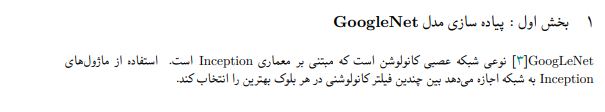

GoogleInceptionV1 network for CIFAR10 network test

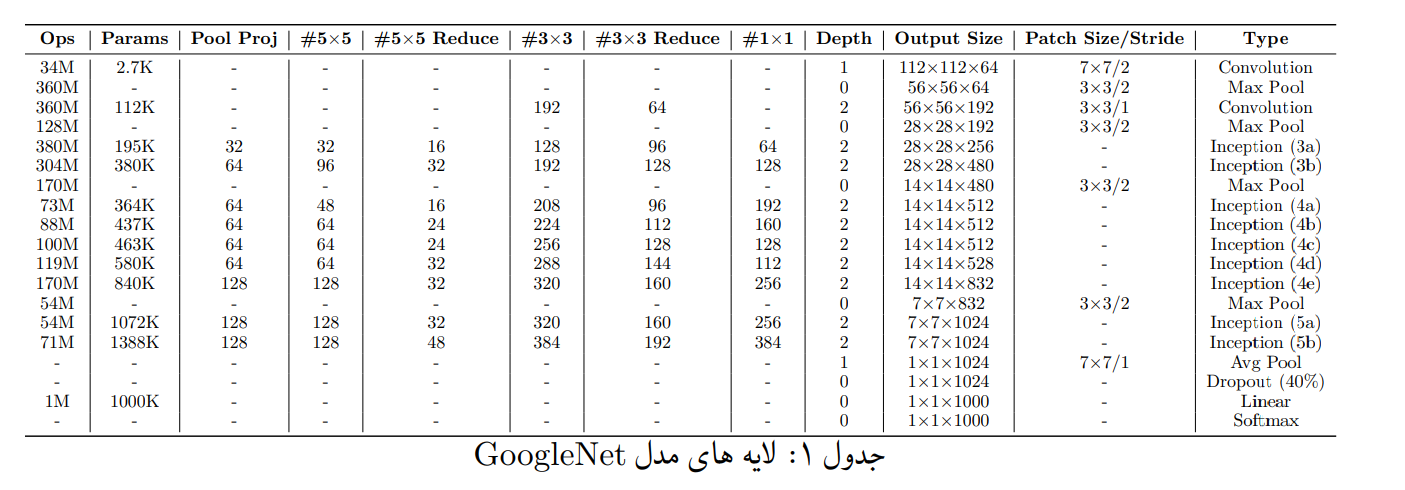

In [1]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import concatenate

In [2]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4):
  # Input:
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer


In [3]:
def GoogLeNet():
  # input layer
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(5, activation = 'softmax')(X1)


  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(1000, activation = 'softmax')(X2)


  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32,
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer
  X = Dropout(0.4)(X)

  # output layer
  X = Dense(1000, activation = 'softmax')(X)

  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [4]:
model = GoogLeNet()

In [5]:
model.summary()

Model: "GoogLeNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 109, 109, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 54, 54, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 54, 54, 192)    │        110,784 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 26, 26, 192)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 26, 26, 96)     │         18,528 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 26, 26, 16)     │          3,088 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 26, 26, 192)    │              0 │ max_pooling2d_1[0][0]  │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 26, 26, 64)     │         12,352 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 26, 26, 128)    │        110,720 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 26, 26, 32)     │         12,832 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 26, 26, 32)     │          6,176 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 26, 26, 256)    │              0 │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 26, 26, 128)    │         32,896 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 26, 26, 32)     │          8,224 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3      

 Total params: 10,523,397 (40.14 MB)

 Trainable params: 10,523,397 (40.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2750 - loss: 1.9024Memory usage: 43.0% | Available: 7395.3MB
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.2751 - loss: 1.9022 - val_accuracy: 0.5003 - val_loss: 1.3438
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5249 - loss: 1.2985Memory usage: 43.0% | Available: 7394.4MB
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5249 - loss: 1.2984 - val_accuracy: 0.6209 - val_loss: 1.0489
Epoch 3/20
1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6293 - loss: 1.0492Memory usage: 43.2% | Available: 7374.1MB
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6293 - loss: 1.0491 - val_accuracy: 0.6509 - val_loss: 0.9685
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6822 - loss: 0.9120Memory usage: 43.1% | Available: 7390.1MB
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6822 - loss: 0.9120 - val_accuracy: 0.7099 - val_loss: 0.8150
Ep

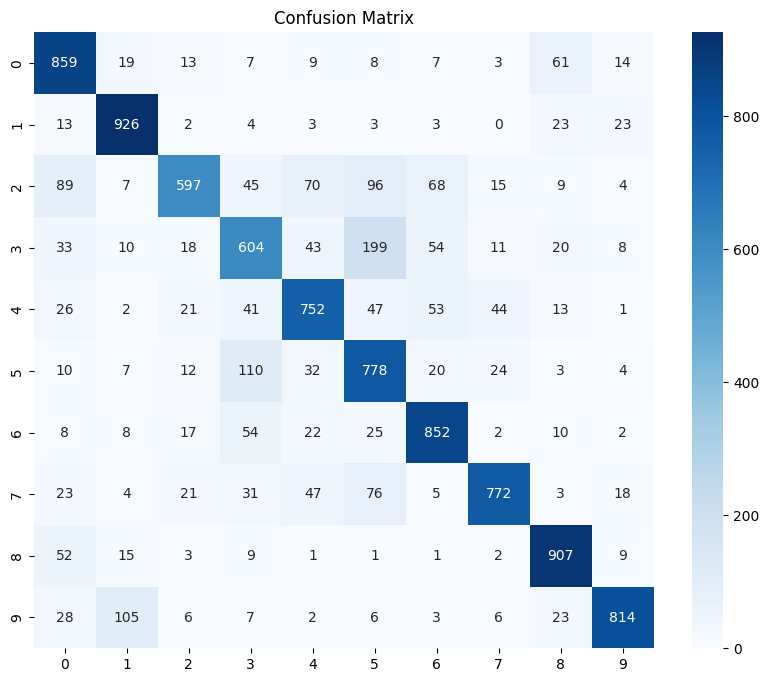


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1000
           1       0.84      0.93      0.88      1000
           2       0.84      0.60      0.70      1000
           3       0.66      0.60      0.63      1000
           4       0.77      0.75      0.76      1000
           5       0.63      0.78      0.69      1000
           6       0.80      0.85      0.82      1000
           7       0.88      0.77      0.82      1000
           8       0.85      0.91      0.88      1000
           9       0.91      0.81      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



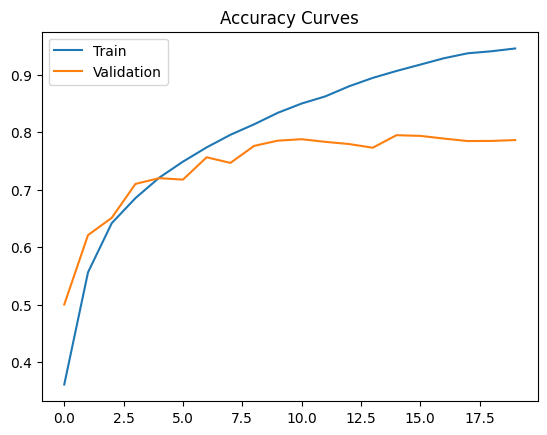

Execution completed successfully


In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, utils, Model, Input, layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import psutil

# Memory-safe data loading
def load_cifar10():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

    # Keep original 32x32 resolution
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # One-hot encode labels
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

# Lightweight Inception
def create_lite_model():
    input_layer = Input(shape=(32, 32, 3))

    # Stem layer
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((2,2))(x)

    # Simplified Inception module
    def inception_module(x, filters):
        path1 = layers.Conv2D(filters, (1,1), activation='relu')(x)

        path2 = layers.Conv2D(filters, (1,1), activation='relu')(x)
        path2 = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(path2)

        path3 = layers.Conv2D(filters, (1,1), activation='relu')(x)
        path3 = layers.Conv2D(filters, (5,5), padding='same', activation='relu')(path3)

        path4 = layers.MaxPooling2D((3,3), padding='same', strides=1)(x)
        path4 = layers.Conv2D(filters, (1,1), activation='relu')(path4)

        return layers.concatenate([path1, path2, path3, path4])

    # Main network
    x = inception_module(x, 64)
    x = layers.MaxPooling2D((2,2))(x)
    x = inception_module(x, 128)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    return Model(input_layer, outputs)

# Memory monitoring callback
class MemoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        mem = psutil.virtual_memory()
        print(f"Memory usage: {mem.percent}% | Available: {mem.available/1024**2:.1f}MB")

def main():
    # Load data first
    (x_train, y_train), (x_test, y_test) = load_cifar10()

    # Create model
    model = create_lite_model()

    # Compile with safety
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train with memory safeguards
    try:
        history = model.fit(
            x_train, y_train,
            validation_data=(x_test, y_test),
            epochs=20,
            batch_size=32,
            callbacks=[MemoryCallback()],
            verbose=1
        )
    except Exception as e:
        print(f"\nTraining stopped: {str(e)}")
        return

    # Evaluation
    def safe_evaluate():
        try:
            # Predict in small batches
            y_pred = model.predict(x_test, batch_size=32)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true_classes = np.argmax(y_test, axis=1)

            # Confusion matrix
            plt.figure(figsize=(10,8))
            sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes),
                        annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix')
            plt.show()

            # Classification report
            print("\nClassification Report:")
            print(classification_report(y_true_classes, y_pred_classes))

            # Accuracy plot
            plt.plot(history.history['accuracy'], label='Train')
            plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title('Accuracy Curves')
            plt.legend()
            plt.show()

        except Exception as e:
            print(f"\nEvaluation failed: {str(e)}")

    safe_evaluate()

    # Clean up resources
    tf.keras.backend.clear_session()

if __name__ == "__main__":
    main()
    print("Execution completed successfully")

GoogleInceptionV2 network for CIFAR10 network test

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3920 - loss: 1.9343Memory: 46.5% | Available: 6941.8MB
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.3921 - loss: 1.9339 - val_accuracy: 0.5566 - val_loss: 1.4726
Epoch 2/20
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6445 - loss: 1.3017Memory: 46.7% | Available: 6921.6MB
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6446 - loss: 1.3015 - val_accuracy: 0.6844 - val_loss: 1.2284
Epoch 3/20
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7396 - loss: 1.1087Memory: 46.8% | Available: 6900.4MB
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7396 - loss: 1.1086 - val_accuracy: 0.6988 - val_loss: 1.1903
Epoch 4/20
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7902 - loss: 1.0018Memory: 46.8% | Available: 6902.2MB
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7901 - loss: 1.0019 - val_accuracy: 0.7159 - val_loss: 1.1518
Epoch 5/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 

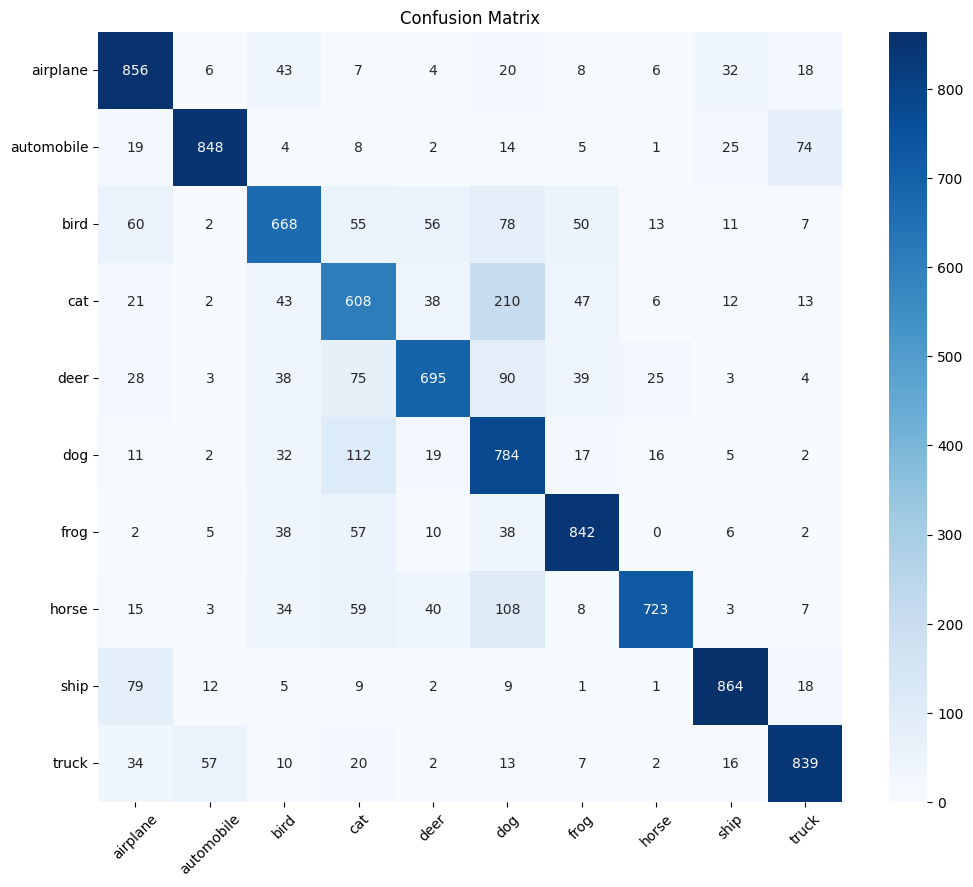


Extended Classification Report:
              precision    recall  f1-score   support

    airplane     0.7609    0.8560    0.8056      1000
  automobile     0.9021    0.8480    0.8742      1000
        bird     0.7301    0.6680    0.6977      1000
         cat     0.6020    0.6080    0.6050      1000
        deer     0.8007    0.6950    0.7441      1000
         dog     0.5748    0.7840    0.6633      1000
        frog     0.8223    0.8420    0.8320      1000
       horse     0.9117    0.7230    0.8065      1000
        ship     0.8843    0.8640    0.8741      1000
       truck     0.8526    0.8390    0.8458      1000

    accuracy                         0.7727     10000
   macro avg     0.7841    0.7727    0.7748     10000
weighted avg     0.7841    0.7727    0.7748     10000



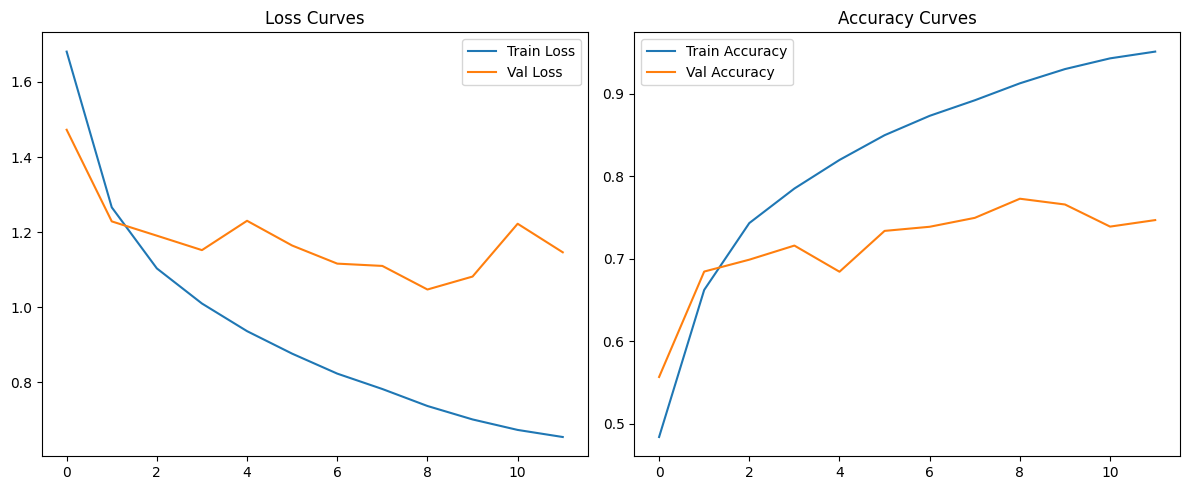

Model saved successfully!
Execution completed successfully


In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, utils, Model, Input, layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import psutil

# Memory-safe data loading
def load_cifar10():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

    # Keep original 32x32 resolution
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # One-hot encode labels
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

# Inception v2 specific components
def conv_bn_relu(x, filters, kernel_size, strides=1, padding='same'):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    return layers.ReLU()(x)

def inception_v2_module(x, filters):
    # Path 1: 1x1 convolution
    path1 = conv_bn_relu(x, filters, (1,1))

    # Path 2: 1x1 -> 3x3
    path2 = conv_bn_relu(x, filters, (1,1))
    path2 = conv_bn_relu(path2, filters, (3,3))

    # Path 3: 1x1 -> 3x3 -> 3x3 (factorized 5x5)
    path3 = conv_bn_relu(x, filters, (1,1))
    path3 = conv_bn_relu(path3, filters, (3,3))
    path3 = conv_bn_relu(path3, filters, (3,3))

    # Path 4: 3x3 pool -> 1x1
    path4 = layers.MaxPooling2D((3,3), strides=1, padding='same')(x)
    path4 = conv_bn_relu(path4, filters, (1,1))

    return layers.concatenate([path1, path2, path3, path4])

def create_inception_v2():
    input_layer = Input(shape=(32, 32, 3))

    # Stem with factorized convolutions
    x = conv_bn_relu(input_layer, 32, (3,3), strides=2)  # Reduced spatial size
    x = conv_bn_relu(x, 32, (3,3))
    x = conv_bn_relu(x, 64, (3,3))
    x = layers.MaxPooling2D((3,3), strides=2)(x)

    # Inception modules with factorization
    x = inception_v2_module(x, 64)
    x = layers.MaxPooling2D((3,3), strides=2)(x)
    x = inception_v2_module(x, 128)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(10, activation='softmax')(x)

    return Model(input_layer, outputs)

# Memory monitoring callback
class MemoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        mem = psutil.virtual_memory()
        print(f"Memory: {mem.percent}% | Available: {mem.available/1024**2:.1f}MB")

def main():
    # Load data
    (x_train, y_train), (x_test, y_test) = load_cifar10()

    # Create model
    model = create_inception_v2()

    # Compile with label smoothing (Inception v2 feature)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )

    # Training with early stopping
    callbacks = [
        MemoryCallback(),
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]

    try:
        history = model.fit(
            x_train, y_train,
            validation_data=(x_test, y_test),
            epochs=20,
            batch_size=64,  # Increased batch size possible due to optimizations
            callbacks=callbacks,
            verbose=1
        )
    except Exception as e:
        print(f"\nTraining stopped: {str(e)}")
        return

    # Enhanced evaluation
    def safe_evaluate():
        try:
            # Predict with test-time augmentation
            y_pred = model.predict(x_test, batch_size=128)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true_classes = np.argmax(y_test, axis=1)

            # Confusion matrix with class names
            class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                           'dog', 'frog', 'horse', 'ship', 'truck']
            plt.figure(figsize=(12,10))
            sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes),
                        annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
            plt.title('Confusion Matrix')
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.show()

            # Detailed classification report
            print("\nExtended Classification Report:")
            print(classification_report(y_true_classes, y_pred_classes, target_names=class_names, digits=4))

            # Combined training curves
            plt.figure(figsize=(12,5))
            plt.subplot(1,2,1)
            plt.plot(history.history['loss'], label='Train Loss')
            plt.plot(history.history['val_loss'], label='Val Loss')
            plt.title('Loss Curves')
            plt.legend()

            plt.subplot(1,2,2)
            plt.plot(history.history['accuracy'], label='Train Accuracy')
            plt.plot(history.history['val_accuracy'], label='Val Accuracy')
            plt.title('Accuracy Curves')
            plt.legend()

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"\nEvaluation failed: {str(e)}")

    safe_evaluate()

    # Save model
    model.save("inception_v2_cifar10.h5")
    print("Model saved successfully!")

    # Cleanup
    tf.keras.backend.clear_session()

if __name__ == "__main__":
    main()
    print("Execution completed successfully")

GoogleInceptionV3 network for CIFAR10 network test

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - aux1_loss: 1.5735 - loss: 2.0707 - main_accuracy: 0.4393 - main_loss: 0.4972Memory Usage: 51.0% | Available: 6354.4MB
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 57ms/step - aux1_loss: 1.5732 - loss: 2.0703 - main_accuracy: 0.4395 - main_loss: 0.4971 - val_aux1_loss: 1.2540 - val_loss: 1.6336 - val_main_accuracy: 0.5837 - val_main_loss: 0.3815 - learning_rate: 5.0000e-04
Epoch 2/20
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - aux1_loss: 1.0558 - loss: 1.3012 - main_accuracy: 0.7193 - main_loss: 0.2454Memory Usage: 51.4% | Available: 6311.6MB
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - aux1_loss: 1.0557 - loss: 1.3011 - main_accuracy: 0.7194 - main_loss: 0.2454 - val_aux1_loss: 1.3319 - val_loss: 1.9382 - val_main_accuracy: 0.4517 - val_main_loss: 0.6055 - learning_rate: 5.0000e-04
Epoch 3/20
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - aux1_loss: 0.9057 - loss: 1.0850 - main_accuracy: 0.7921 - main_loss: 0.1793Memory Usage: 51.5% | Available: 

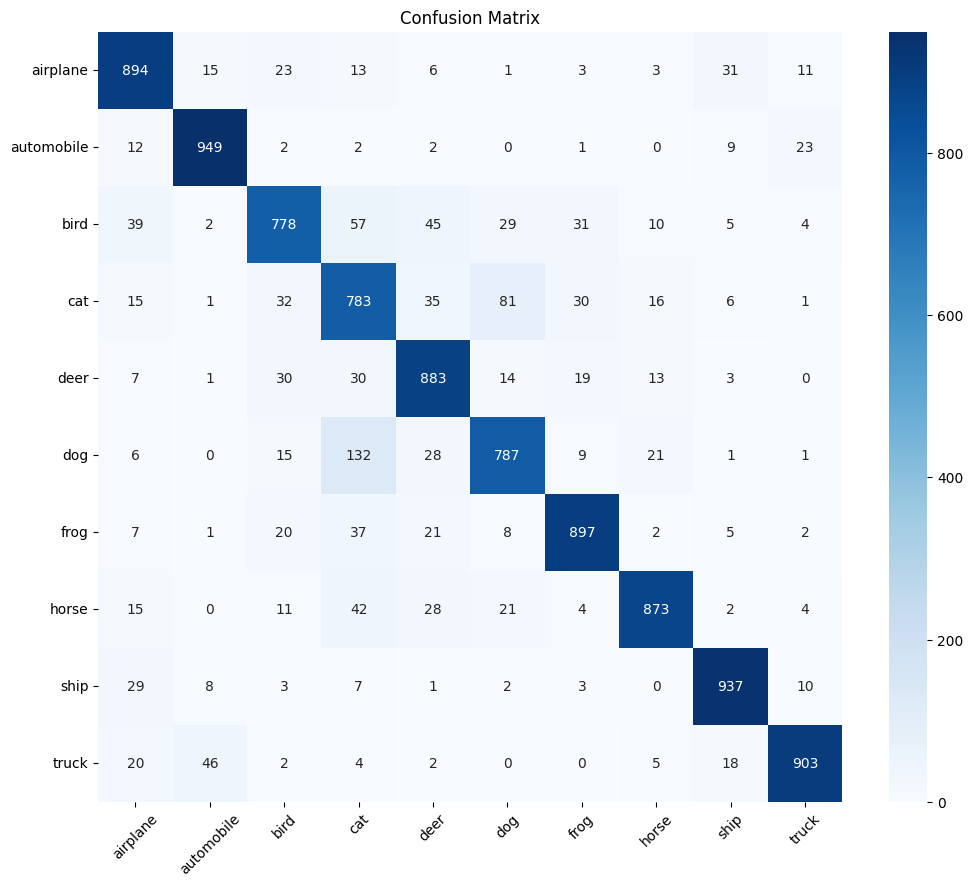


Classification Report:
              precision    recall  f1-score   support

    airplane     0.8563    0.8940    0.8748      1000
  automobile     0.9277    0.9490    0.9382      1000
        bird     0.8493    0.7780    0.8121      1000
         cat     0.7073    0.7830    0.7432      1000
        deer     0.8402    0.8830    0.8610      1000
         dog     0.8346    0.7870    0.8101      1000
        frog     0.8997    0.8970    0.8983      1000
       horse     0.9258    0.8730    0.8986      1000
        ship     0.9213    0.9370    0.9291      1000
       truck     0.9416    0.9030    0.9219      1000

    accuracy                         0.8684     10000
   macro avg     0.8704    0.8684    0.8687     10000
weighted avg     0.8704    0.8684    0.8687     10000



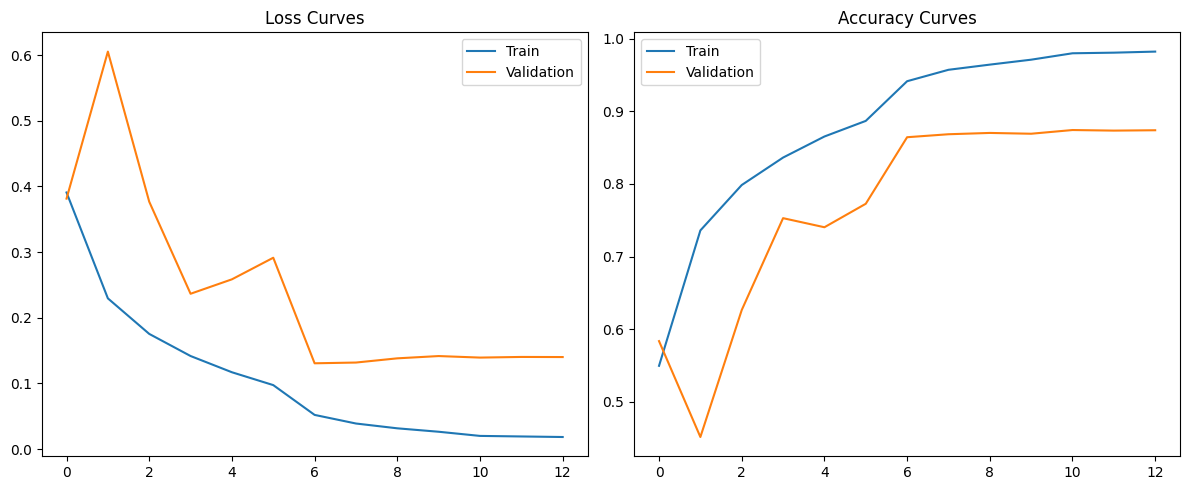

Model saved successfully!
Execution completed successfully


In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, utils, Model, Input, layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import psutil

def load_cifar10():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

def conv2d_bn(x, filters, kernel_size, strides=1, padding='same', activation=True):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    if activation:
        x = layers.ReLU()(x)
    return x

def inception_v3_module(x, filters):
    # Branch 1x1
    path1 = conv2d_bn(x, filters[0], (1,1))

    # Branch 1x1 -> 3x3
    path2 = conv2d_bn(x, filters[1], (1,1))
    path2 = conv2d_bn(path2, filters[2], (3,3))

    # Branch 1x1 -> 3x3 -> 3x3
    path3 = conv2d_bn(x, filters[3], (1,1))
    path3 = conv2d_bn(path3, filters[4], (3,3))
    path3 = conv2d_bn(path3, filters[5], (3,3))

    # Branch 3x3 pool -> 1x1
    path4 = layers.AveragePooling2D((3,3), strides=1, padding='same')(x)
    path4 = conv2d_bn(path4, filters[6], (1,1))

    return layers.concatenate([path1, path2, path3, path4])

def auxiliary_classifier(x, name):
    x = layers.AveragePooling2D((3,3), strides=2)(x)  # Reduced from 5 to 3
    x = conv2d_bn(x, 128, (1,1))
    x = layers.Flatten()(x)
    x = layers.Dense(512)(x)  # Reduced from 1024 to 512
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return layers.Dense(10, activation='softmax', name=name)(x)

def create_inception_v3():
    input_layer = Input(shape=(32, 32, 3))

    # Modified stem network
    x = conv2d_bn(input_layer, 32, (3,3), strides=1)  # Changed stride from 2 to 1
    x = conv2d_bn(x, 32, (3,3))
    x = conv2d_bn(x, 64, (3,3))
    x = layers.MaxPooling2D((3,3), strides=2)(x)

    # First inception module
    x = inception_v3_module(x, [64, 48, 64, 64, 96, 96, 32])

    # Add auxiliary classifier here
    aux1 = auxiliary_classifier(x, 'aux1')

    # Continue with network
    x = layers.MaxPooling2D((3,3), strides=2)(x)
    x = inception_v3_module(x, [96, 64, 96, 96, 128, 128, 64])
    x = inception_v3_module(x, [96, 64, 96, 96, 128, 128, 64])

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.5)(x)
    main_output = layers.Dense(10, activation='softmax', name='main')(x)

    return Model(inputs=input_layer, outputs=[main_output, aux1])

class MemoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        mem = psutil.virtual_memory()
        print(f"Memory Usage: {mem.percent}% | Available: {mem.available/1024**2:.1f}MB")

def main():
    (x_train, y_train), (x_test, y_test) = load_cifar10()

    model = create_inception_v3()

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),  # Reduced learning rate
        loss={
            'main': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
            'aux1': 'categorical_crossentropy'
        },
        loss_weights={'main': 1.0, 'aux1': 0.3},
        metrics={'main': ['accuracy']}
    )

    callbacks = [
        MemoryCallback(),
        tf.keras.callbacks.ReduceLROnPlateau(patience=2),
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]

    try:
        history = model.fit(
            x_train, {'main': y_train, 'aux1': y_train},
            validation_data=(x_test, {'main': y_test, 'aux1': y_test}),
            epochs=20,
            batch_size=64,
            callbacks=callbacks,
            verbose=1
        )
    except Exception as e:
        print(f"\nTraining stopped: {str(e)}")
        return

    def safe_evaluate():
        try:
            y_pred, _ = model.predict(x_test, batch_size=128)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true_classes = np.argmax(y_test, axis=1)

            class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                          'dog', 'frog', 'horse', 'ship', 'truck']
            plt.figure(figsize=(12,10))
            sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes),
                       annot=True, fmt='d', cmap='Blues',
                       xticklabels=class_names, yticklabels=class_names)
            plt.title('Confusion Matrix')
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.show()

            print("\nClassification Report:")
            print(classification_report(y_true_classes, y_pred_classes,
                                       target_names=class_names, digits=4))

            plt.figure(figsize=(12,5))
            plt.subplot(1,2,1)
            plt.plot(history.history['main_loss'], label='Train')
            plt.plot(history.history['val_main_loss'], label='Validation')
            plt.title('Loss Curves')
            plt.legend()

            plt.subplot(1,2,2)
            plt.plot(history.history['main_accuracy'], label='Train')
            plt.plot(history.history['val_main_accuracy'], label='Validation')
            plt.title('Accuracy Curves')
            plt.legend()

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"\nEvaluation failed: {str(e)}")

    safe_evaluate()
    model.save("inception_v3_cifar10_fixed.h5")
    print("Model saved successfully!")
    tf.keras.backend.clear_session()

if __name__ == "__main__":
    main()
    print("Execution completed successfully")